In [2]:
#!pip install yfinance --upgrade --no-cache-dir

In [4]:
#!pip3 install pandas_datareader

In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# ___library_import_statements___
import pandas as pd

# for pandas_datareader, otherwise it might have issues, sometimes there is some version mismatch
pd.core.common.is_list_like = pd.api.types.is_list_like

# make pandas to print dataframes nicely
pd.set_option('expand_frame_repr', False)  

import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time

#newest yahoo API 
import yfinance as yahoo_finance

#optional 
#yahoo_finance.pdr_override()

%matplotlib inline

In [6]:
# ___variables___
ticker = 'AAPL'

start_time = datetime.datetime(2017, 10, 1)
#end_time = datetime.datetime(2019, 1, 20)
end_time = datetime.datetime.now().date().isoformat()         # today

In [8]:
# yahoo gives only daily historical data
connected = False
while not connected:
    try:
        ticker_df = web.get_data_yahoo(ticker, start=start_time, end=end_time)
        connected = True
        print('connected to yahoo')
    except Exception as e:
        print("type error: " + str(e))
        time.sleep( 5 )
        pass   

# use numerical integer index instead of date    
ticker_df = ticker_df.reset_index()
ticker_df.head(5)

connected to yahoo


,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-10-02,38.612499,38.180000,38.564999,38.452499,74795200.0,36.753414
1,2017-10-03,38.772499,38.477501,38.502499,38.619999,64921200.0,36.913517
2,2017-10-04,38.465000,38.115002,38.407501,38.369999,80655200.0,36.674561
3,2017-10-05,38.860001,38.512501,38.544998,38.847500,85135200.0,37.130966
4,2017-10-06,38.872501,38.639999,38.742500,38.825001,69630400.0,37.109447


In [9]:
df = ticker_df

In [10]:
def computeRSI (data, time_window):
    diff = data.diff(1).dropna()        # diff in one field(one day)

    #this preservers dimensions off diff values
    up_chg = 0 * diff
    down_chg = 0 * diff
    
    # up change is equal to the positive difference, otherwise equal to zero
    up_chg[diff > 0] = diff[ diff>0 ]
    
    # down change is equal to negative deifference, otherwise equal to zero
    down_chg[diff < 0] = diff[ diff < 0 ]
    
    # check pandas documentation for ewm
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html
    # values are related to exponential decay
    # we set com=time_window-1 so we get decay alpha=1/time_window
    up_chg_avg   = up_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    down_chg_avg = down_chg.ewm(com=time_window-1 , min_periods=time_window).mean()
    
    rs = abs(up_chg_avg/down_chg_avg)
    rsi = 100 - 100/(1+rs)
    return rsi

In [11]:
df['RSI'] = computeRSI(df['Adj Close'], 14)

In [12]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,RSI
0,2017-10-02,38.612499,38.180000,38.564999,38.452499,74795200.0,36.753414,NaN
1,2017-10-03,38.772499,38.477501,38.502499,38.619999,64921200.0,36.913517,NaN
2,2017-10-04,38.465000,38.115002,38.407501,38.369999,80655200.0,36.674561,NaN
3,2017-10-05,38.860001,38.512501,38.544998,38.847500,85135200.0,37.130966,NaN
4,2017-10-06,38.872501,38.639999,38.742500,38.825001,69630400.0,37.109447,NaN


In [13]:
df.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,RSI
960,2021-07-27,149.210007,145.550003,149.119995,146.770004,104818600.0,146.770004,61.313211
961,2021-07-28,146.970001,142.539993,144.809998,144.979996,118931200.0,144.979996,56.600104
962,2021-07-29,146.550003,144.580002,144.690002,145.639999,56699500.0,145.639999,57.885569
963,2021-07-30,146.330002,144.110001,144.380005,145.860001,70382000.0,145.860001,58.328639
964,2021-08-02,146.949997,145.250000,146.360001,145.520004,60129097.0,145.520004,57.324905


In [27]:
df['ema-5'] = df['Adj Close'].ewm(com=14-1 , min_periods=14).mean()

In [28]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close,RSI,SMA-5,ema-5
0,2017-10-02,38.612499,38.180000,38.564999,38.452499,74795200.0,36.753414,NaN,NaN,NaN
1,2017-10-03,38.772499,38.477501,38.502499,38.619999,64921200.0,36.913517,NaN,NaN,NaN
2,2017-10-04,38.465000,38.115002,38.407501,38.369999,80655200.0,36.674561,NaN,NaN,NaN
3,2017-10-05,38.860001,38.512501,38.544998,38.847500,85135200.0,37.130966,NaN,NaN,NaN
4,2017-10-06,38.872501,38.639999,38.742500,38.825001,69630400.0,37.109447,NaN,36.916381,NaN


In [ ]:
df['EWA-5'] = df['Adj Close'].rolling(window=5).mean()

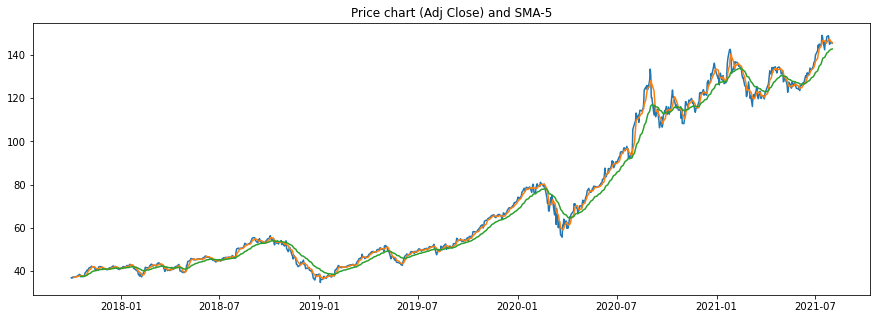

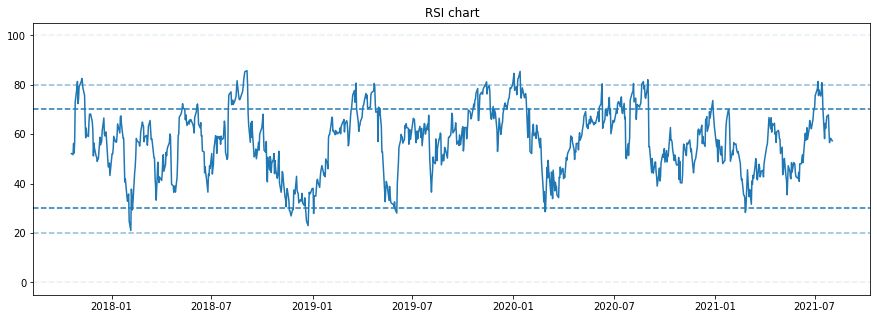

In [29]:
# plot price
plt.figure(figsize=(15,5))
plt.plot(df['Date'], df['Adj Close'])
plt.plot(df['Date'], df['SMA-5'])
plt.plot(df['Date'], df['ema-5'])
plt.title('Price chart (Adj Close) and SMA-5')
plt.show()


# plot correspondingRSI values and significant levels
plt.figure(figsize=(15,5))
plt.title('RSI chart')
plt.plot(df['Date'], df['RSI'])


plt.axhline(0, linestyle='--', alpha=0.1)
plt.axhline(20, linestyle='--', alpha=0.5)
plt.axhline(30, linestyle='--')

plt.axhline(70, linestyle='--')
plt.axhline(80, linestyle='--', alpha=0.5)
plt.axhline(100, linestyle='--', alpha=0.1)
plt.show()